In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv("/home/israel/Documentos/Machine-learning/python-ml-course/datasets/bank/bank.csv", sep = ";")

In [79]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [80]:
data.shape

(4119, 21)

In [81]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [82]:
data["y"] = (data["y"] == "yes").astype(int)

In [83]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [84]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Vamos a considerar solo una educación básica

In [85]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])


data["education"] = np.where(data["education"] == "high.school", "High school", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University degree", data["education"])
data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [86]:
data["education"].unique()

array(['Basic', 'High school', 'University degree', 'Professional course',
       'Unknown', 'Illiterate'], dtype=object)

**Análisis exploratorio de datos**

Comencemos analizando la columna de ventas, veamos si vendemos o no

In [87]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [88]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [89]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


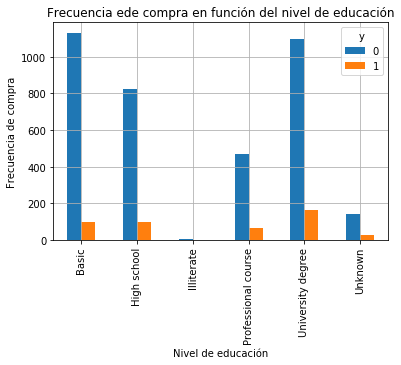

In [90]:
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title("Frecuencia ede compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra")
plt.grid()

Text(0, 0.5, 'Proporción de clientes')

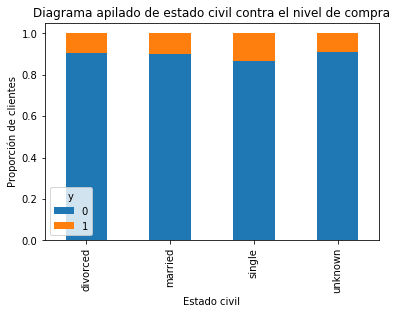

In [91]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compra")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes") # no hay mucho que decir

Text(0, 0.5, 'Frecuencia de compra del producto')

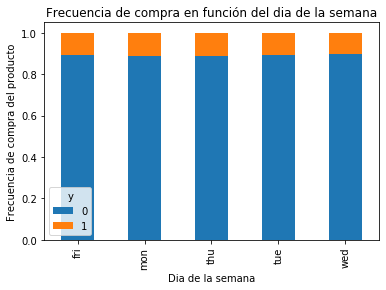

In [92]:
table = pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(axis = 1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en función del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

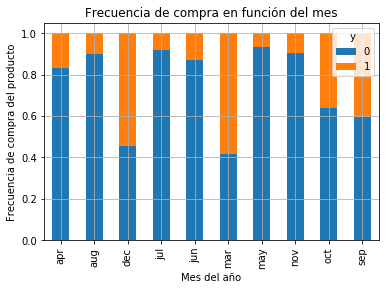

In [93]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(axis = 1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")
plt.grid()
plt.show()

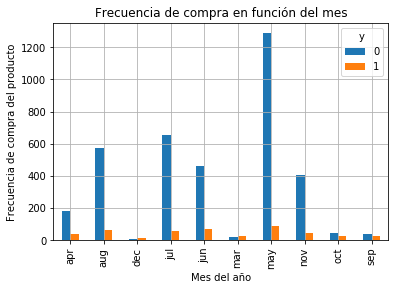

In [94]:
# Sin división para ver la frecuencia real de compra
table = pd.crosstab(data.month,data.y)
table.plot(kind = 'bar', stacked = False)
plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Frecuencia de compra del producto')
plt.grid()
plt.show()

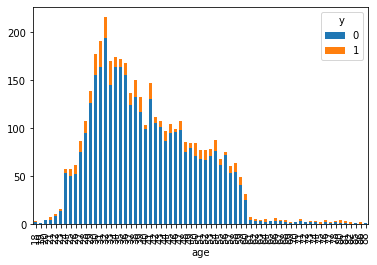

In [95]:
pd.crosstab(data.age,data.y).plot(kind="bar", stacked = True)

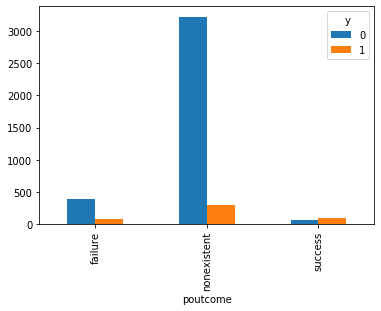

In [96]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')

### Conversión de las varaibles cualitativas a dummies

In [97]:
categories = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

for category in categories:
    cat_dummies = pd.get_dummies(data[category], prefix = category)
    data_new = data.join(cat_dummies)
    data = data_new

In [98]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High school,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High school,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [99]:
data_vars = data.columns.values.tolist()

In [100]:
to_keep  = [v for v in data_vars if v not in categories]

In [101]:
bank_data  = data[to_keep]
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [102]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [103]:
n = 12

In [104]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [105]:
lr = LogisticRegression()

In [106]:
rfe = RFE(lr,n)
rfe = rfe.fit(bank_data[X], bank_data[Y])

In [107]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True False  True False False
  True  True  True False False False False False False False  True False
  True]


In [108]:
print(rfe.ranking_)

[34 44 20 46  1 19 30 25  1 41  2 13 11 42 12  1  8 23  3  1  1 47 17 33
 31 49 26 14 48 21 36  7 38 32 50  9 16 45 15 22 40  5 28  1  6  1 24  4
  1  1  1 39 18 43 27 37 29 10  1 35  1]


In [109]:
z = zip(bank_data_vars,rfe.support_,rfe.ranking_)

In [110]:
list(z)

[('age', False, 34),
 ('duration', False, 44),
 ('campaign', False, 20),
 ('pdays', False, 46),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 30),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 41),
 ('y', False, 2),
 ('job_admin.', False, 13),
 ('job_blue-collar', False, 11),
 ('job_entrepreneur', False, 42),
 ('job_housemaid', False, 12),
 ('job_management', True, 1),
 ('job_retired', False, 8),
 ('job_self-employed', False, 23),
 ('job_services', False, 3),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 47),
 ('job_unknown', False, 17),
 ('marital_divorced', False, 33),
 ('marital_married', False, 31),
 ('marital_single', False, 49),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 14),
 ('education_High school', False, 48),
 ('education_Illiterate', False, 21),
 ('education_Professional course', False, 36),
 ('education_University degree', False, 7),
 ('education_Unk

In [111]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [112]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo con statsmodel.api

In [113]:
import statsmodels.api as sm

In [114]:
logit_model = sm.Logit(Y,X)

In [115]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [116]:
result.summary2() # Df indica los grados de libertad

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-10-20 19:21  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación con scikit-learn

In [117]:
from sklearn import linear_model

In [118]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
logit_model.score(X,Y)

0.8958485069191552

In [120]:
1-Y.mean()

0.8905074047098811

In [121]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381829]
1,euribor3m,[-0.5443670397997228]
2,job_blue-collar,[-0.3533138743501033]
3,job_retired,[0.36165159081101]
4,month_aug,[0.6292588895076865]
5,month_dec,[1.194397457212219]
6,month_jul,[0.9630554140671063]
7,month_jun,[1.0566897056472497]
8,month_mar,[1.638668023459536]
9,month_nov,[0.45770841910621496]


### Validación del modelo

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [124]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
from IPython.display import Math, display, Latex
display(Math(r'Y_p = \begin{cases}0& si \ p\leq 0.5 \\ 1 &si \ p>0.5 \end{cases}'))

<IPython.core.display.Math object>

In [126]:
probs = lm.predict_proba(X_test)

In [127]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [128]:
prediction = lm.predict(X_test)

In [129]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
display(Math(r'\varepsilon \in (0,1),Y_p = \begin{cases}0& si \ p\leq \varepsilon \\ 1 &si \ p>\varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [131]:
probs_df = pd.DataFrame(probs)
probs_df

,0,1
0,0.954096,0.045904
1,0.838966,0.161034
2,0.932165,0.067835
3,0.937778,0.062222
4,0.957692,0.042308
...,...,...
1231,0.937778,0.062222
1232,0.937843,0.062157
1233,0.650984,0.349016
1234,0.973810,0.026190


In [132]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df>threshold,1,0) #(condición,valor para True, valor para False)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [133]:
pd.crosstab(prob_df.prediction, columns = "Count")

col_0,Count
prediction,
0,846
1,390


In [134]:
390/len(prob_df)*100

31.55339805825243

In [135]:
threshold = 0.05 # Usualmente este es el umbral que utilizan los bancos, asi captan un mayor numero de clintes
prob_df["prediction"] = np.where(prob_df>threshold,1,0) 
pd.crosstab(prob_df.prediction, columns = "Count")

col_0,Count
prediction,
0,504
1,732


In [136]:
732/len(prob_df)*100

59.22330097087378

**Eficacia del modelo**

In [137]:
from sklearn import metrics

In [138]:
metrics.accuracy_score(y_test,prediction)

0.901294498381877

### Validación cruzada

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
scores = cross_val_score(lm,X,Y, scoring = "accuracy", cv = 10) #en cv indicamos el número de particiones

In [141]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [142]:
scores.mean() # El modelo generaliza bien la información suministrada para ser entrenada

0.8943903101599225

### Matrices de Confusión y curvas ROC

Recordemos nuestra tablita

In [143]:
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


Ahora odemos hacer una matriz de confusión

In [144]:
confusion_matrix = pd.crosstab(prob_df.actual, prob_df.prediction)
confusion_matrix

prediction,0,1
actual,,
0,806,308
1,40,82


In [145]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]

In [146]:
sens = TP/(TP+FN)
sens

0.21025641025641026

In [147]:
esp_1 = 1-TN/(TN+FP)
esp_1

0.047281323877068515

In [148]:
thresholds =[0.04,0.05,0.07,0.10,0.12,0.15,0.18,0.20,0.25,0.3,0.4,0.5]
sensitivities  = [1] #  Para que acabe en las puntas de los diagonales
especifities_1 = [1]
for t in thresholds:
    prob_df['prediction']  = np.where(prob_df[0]> t,1,0)
    prob_df['actual'] = list(y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    esp_1 = 1-TN/(TN+FP)
    especifities_1.append(esp_1)
    
sensitivities.append(0) 
especifities_1.append(0)  #El uno va como sensibilidad de partida


In [149]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [150]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

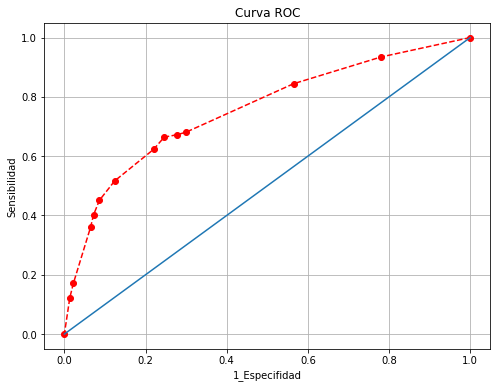

In [151]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(8,6))

plt.plot(especifities_1,sensitivities, marker = "o", linestyle = '--', color = "red")
plt.xlabel("1_Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.plot(x,y)
plt.grid()
plt.show()

**Con scikit-learn**

In [158]:
from sklearn import metrics

In [162]:
espc_1, sensit, _ = metrics.roc_curve(y_test, prob)

In [163]:
auc = metrics.auc(espc_1,sensit)

In [164]:
auc

0.7579171204049798

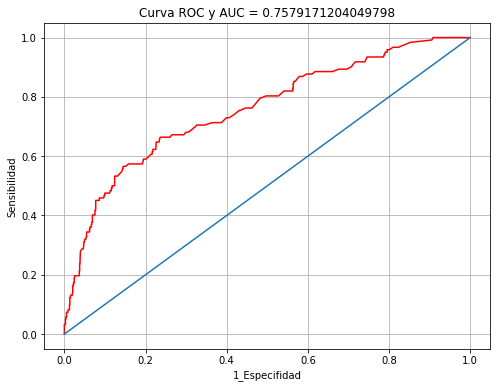

In [168]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(8,6))

plt.plot(espc_1,sensit, color = "red")
plt.xlabel("1_Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC y AUC = 0.7579171204049798")
plt.plot(x,y)
plt.grid()
plt.show()